In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
from nltk.tokenize import TweetTokenizer
import pickle
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# read the model dataframe
df = pd.read_csv('model_data.csv')

In [3]:
# tokenize tweets using gensim inbuilt library
tokenizer = TweetTokenizer(preserve_case=False, 
                           strip_handles=True,
                           reduce_len=True)

In [4]:
# basic preprocessing steps follows this
data = df[['lemmatized_tweets']]
target = df[['cyberbullying_type']]

In [5]:
label_codes = {'age':1, 
               'gender':2, 
               'ethnicity':3, 
               'religion':4, 
               'other_cyberbullying':5, 
               'not_cyberbullying':0
              }
target = target.replace({'cyberbullying_type':label_codes})

In [6]:
# train/test split
X_train, X_test, y_train, y_test = train_test_split(np.array(data['lemmatized_tweets']), 
                                                    np.array(target['cyberbullying_type']), 
                                                    test_size=0.30, random_state=42)

In [7]:
vec = TfidfVectorizer(use_idf=True, min_df=0.00002, max_df=0.6)
train = vec.fit_transform(X_train.astype('U'))
test = vec.transform(X_test.astype('U'))

In [8]:
# Loading all saved models
base_dir = 'model/'
dectree = pickle.load(open(base_dir+'DecisionTree/model.sav', 'rb'))
rforest = pickle.load(open(base_dir+'RandomForest/model.sav', 'rb'))
adaboost = pickle.load(open(base_dir+'AdaBoost/model.sav', 'rb'))
xgb = pickle.load(open(base_dir+'XGBoost/model.sav', 'rb'))
catboost = pickle.load(open(base_dir+'CatBoost/model.sav', 'rb'))

In [9]:
models = []
models.append(('Decision Tree', dectree))
models.append(('Random Forest', rforest))
models.append(('AdaBoost', adaboost))
models.append(('XGBoost', xgb))
models.append(('CatBoost', catboost))

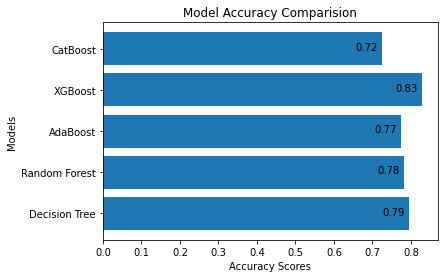

In [10]:
#Evaluating performance
results = []
names = []
scoring = 'accuracy'

for name, model in models:
    y_pred = model.predict(test)
    results.append(accuracy_score(y_test, y_pred))
    names.append(name)

plot = plt.barh(names, results)
plt.xlabel('Accuracy Scores')
plt.ylabel('Models')
plt.title('Model Accuracy Comparision')
for p in plot.patches:
    width = p.get_width()
    plt.text(p.get_width()-0.04, p.get_y()+0.55*p.get_height(),
             '{:1.2f}'.format(width),
             ha='center', va='center')